<a href="https://colab.research.google.com/github/flatplanet/Pytorch-Tutorial-Youtube/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [8]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower) -->
  # Hidden Layer1 (number of neurons) -->
  # H2 (n) -->
  # output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [9]:
# Pick a manual seed for randomization
torch.manual_seed(41)
# Create an instance of model
model = Model()

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url) 


In [12]:
my_df.tail() #last 5 lines of csv
print(my_df['variety'].unique())


['Setosa' 'Versicolor' 'Virginica']


In [13]:
# Change last column from strings to integers
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df

/tmp/ipykernel_55177/1249557430.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [14]:
# Train Test Split!  Set X, y
X = my_df.drop('variety', axis=1)
y = my_df['variety']

In [15]:
# Convert these to numpy arrays
X = X.values
y = y.values

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [18]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [19]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [20]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [21]:
# Train our model!
# Epochs? (one run thru all the training data in our network)
epochs = 1000
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and loss: 1.125203251838684
Epoch: 10 and loss: 1.0097211599349976
Epoch: 20 and loss: 0.8162347674369812
Epoch: 30 and loss: 0.585993230342865
Epoch: 40 and loss: 0.4003389775753021
Epoch: 50 and loss: 0.26794716715812683
Epoch: 60 and loss: 0.1796349585056305
Epoch: 70 and loss: 0.12165623158216476
Epoch: 80 and loss: 0.0860651507973671
Epoch: 90 and loss: 0.06522614508867264
Epoch: 100 and loss: 0.05286872014403343
Epoch: 110 and loss: 0.04508011043071747
Epoch: 120 and loss: 0.03979310765862465
Epoch: 130 and loss: 0.03596426919102669
Epoch: 140 and loss: 0.03302799537777901
Epoch: 150 and loss: 0.030512524768710136
Epoch: 160 and loss: 0.02773350290954113
Epoch: 170 and loss: 0.024612102657556534
Epoch: 180 and loss: 0.02167237363755703
Epoch: 190 and loss: 0.01932021789252758
Epoch: 200 and loss: 0.0174928717315197
Epoch: 210 and loss: 0.01604374870657921
Epoch: 220 and loss: 0.01483999565243721
Epoch: 230 and loss: 0.013800058513879776
Epoch: 240 and loss: 0.01287885662

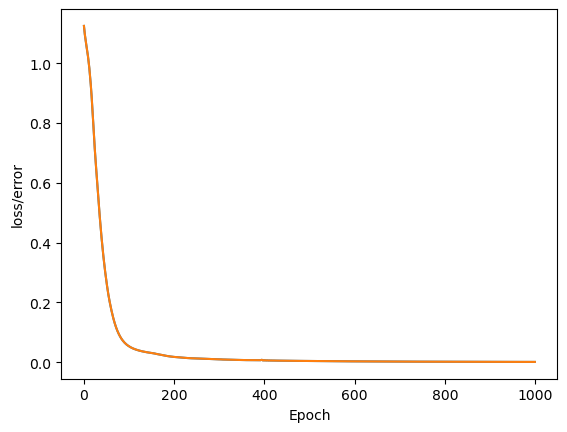

In [61]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')
plt.show()

In [23]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad():  # Basically turn off back propogation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss or error


In [24]:
loss

tensor(0.7258)

In [25]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'


    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')

1.)  tensor([-10.6649,  -1.2855,  20.5699]) 	 2 	 2
2.)  tensor([-13.7519,  -6.1630,  30.8212]) 	 2 	 2
3.)  tensor([-15.8544,  -6.3233,  34.4868]) 	 2 	 2
4.)  tensor([ 13.5662,  26.6169, -20.1908]) 	 1 	 1
5.)  tensor([-13.2983,  -3.6768,  27.4596]) 	 2 	 2
6.)  tensor([ 24.5100,  37.3529, -36.9165]) 	 1 	 1
7.)  tensor([-8.2902,  2.1887, 16.6039]) 	 2 	 2
8.)  tensor([ 14.4748,  27.6771, -21.7116]) 	 1 	 1
9.)  tensor([-12.0742,  -1.9638,  23.6258]) 	 2 	 2
10.)  tensor([-14.7158,  -6.6926,  32.9873]) 	 2 	 2
11.)  tensor([-5.1405,  5.5091, 11.2662]) 	 2 	 2
12.)  tensor([ 106.8321,   94.9895, -139.1232]) 	 0 	 0
13.)  tensor([  96.9599,   86.0550, -126.1875]) 	 0 	 0
14.)  tensor([ 29.1906,  37.9628, -42.1385]) 	 1 	 1
15.)  tensor([  93.2399,   84.8740, -122.1188]) 	 0 	 0
16.)  tensor([-0.3968, 10.9889,  3.3490]) 	 2 	 1
17.)  tensor([  97.9983,   87.4307, -127.7299]) 	 0 	 0
18.)  tensor([-8.0183,  1.9037, 16.0338]) 	 1 	 2
19.)  tensor([ 111.8172,   98.6710, -145.2970]) 	 0 	 0

In [26]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [27]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 102.8692,   91.2570, -133.8676])


In [28]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

In [29]:
with torch.no_grad():
  print(model(newer_iris))

tensor([-10.5846,  -1.0177,  20.3451])


In [30]:
# Save our NN Model
torch.save(model.state_dict(), 'my_really_awesome_iris_model.pt')

In [31]:
# Load the Saved Model
new_model = Model()
new_model.load_state_dict(torch.load('my_really_awesome_iris_model.pt'))

/tmp/ipykernel_55177/1212390300.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('my_really_awesome_iris_model.pt'))


<All keys matched successfully>

In [32]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)